In [ ]:
# CAPSTONE PROJECT -2

In [ ]:
# PROJECT TITLE: CLUSTERING ANALYSIS ON GOOGLE PLAY STORE DATASET

In [ ]:
# DELIVERABLES:
# 1. A comprehensive report detailing the methodology, analysis, and findings.
# 2. Visualizations illustrating cluster assignments and characteristics of each cluster.
# 3. Code implementation demonstrating data preprocessing, clustering, and evaluation.

In [ ]:
# STEPS FOR CLUSTERING ANALYSIS

# 1. DATA PREPROCESSING
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# 3. CLUSTERING TECHNIQUES
# 4. MODEL EVALUATION
# 5. CONCLUSION AND RECOMMENDATIONS

In [ ]:
# STEP 1.DATA PREPROCESSING

In [ ]:
# LOAD THE DATASET

In [91]:
import pandas as pd

# Load the dataset from the provided CSV file
url = "googleplaystore.csv"
data = pd.read_csv(url)

# Display initial information about the dataset
print("Initial Data Info:")
print(data.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [ ]:
# DATA CLEANING

In [92]:
# Step 1: Handle Missing Values
# Drop rows with any missing values
data.dropna(inplace=True)

# Step 2: Convert 'Size' from string to float (e.g., "19M" to 19.0)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())  # Convert to float for megabytes
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    return None

data['Size'] = data['Size'].apply(convert_size)

# Step 3: Convert 'Installs' from string to integer (e.g., "10,000+" to 10000)
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Display the cleaned dataset
print("Cleaned Data:")
print(data.head())

Cleaned Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159  19.0     10000  Free     0       Everyone   
1     967  14.0    500000  Free     0       Everyone   
2   87510   8.7   5000000  Free     0       Everyone   
3  215644  25.0  50000000  Free     0           Teen   
4     967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play

In [ ]:
# ONE-HOT ENCODING

In [93]:
# Display initial information about the dataset
print("Initial Data Info:")
print(data.info())
# Step: Convert categorical variables into numerical formats using One-Hot Encoding
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Display the first few rows of the encoded dataset
print("Data after One-Hot Encoding:")
print(data_encoded.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB
None
Data after One-Hot Encoding:
                                                 App  Rating Reviews  Size  \
0     Photo Editor & Cand

In [ ]:
# NORMALIZATION

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from the provided CSV file
url = "googleplaystore.csv"
data = pd.read_csv(url)


# Display initial information about the dataset
print("Initial Data Info:")
print(data.info())

# Data Cleaning (as a reminder, if needed)
# Handle missing values by dropping rows with NaN values
data.dropna(inplace=True)

# Convert 'Size' from string to float (e.g., "19M" to 19)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    return None

data['Size'] = data['Size'].apply(convert_size)

# Convert 'Installs' from string to integer (e.g., "10,000+" to 10000)
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Display the normalized data
print("Normalized Data:")
print(data[numerical_features].head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
Normalized Data:
   Rating Reviews  Size  Installs Price
0     4.1     159  19.0     10000     0
1     3.9     967  14.0    500000     0
2 

In [ ]:
# FEATURE SELECTION

In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from the provided CSV file
url = "googleplaystore.csv"
data = pd.read_csv(url)


# Data Cleaning (if not already done)
data.dropna(inplace=True)

# Convert 'Size' from string to float (e.g., "19M" to 19)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    return None

data['Size'] = data['Size'].apply(convert_size)

# Convert 'Installs' from string to integer (e.g., "10,000+" to 10000)
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Normalize numerical features using StandardScaler
numerical_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
scaler = StandardScaler()
# data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step: Feature Selection
# Select relevant features for clustering
selected_features = data[numerical_features + list(data.columns[data.columns.str.startswith('Category_')])]

# Display the selected features
print("Selected Features for Clustering:")
print(selected_features.head())

Selected Features for Clustering:
   Rating Reviews  Size  Installs Price
0     4.1     159  19.0     10000     0
1     3.9     967  14.0    500000     0
2     4.7   87510   8.7   5000000     0
3     4.5  215644  25.0  50000000     0
4     4.3     967   2.8    100000     0


In [ ]:
# DISPLAY SELECTED FEATURES

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from the provided CSV file
url = "googleplaystore.csv"
data = pd.read_csv(url)

# Data Cleaning (if not already done)
data.dropna(inplace=True)

# Convert 'Size' from string to float (e.g., "19M" to 19)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    return None

data['Size'] = data['Size'].apply(convert_size)

# Convert 'Installs' from string to integer (e.g., "10,000+" to 10000)
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Convert 'Price' from string to float (e.g., "$0" to 0.0)
# data['Price'] = data['Price'].replace({'\$': '', '0': 0}).astype(float)

# Normalize numerical features using StandardScaler
numerical_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
scaler = StandardScaler()
# data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Feature Selection: Select relevant features for clustering
selected_features = data[numerical_features + list(data.columns[data.columns.str.startswith('Category_')])]

# Step: Display Selected Features
print("Selected Features for Clustering:")
print(selected_features.head())

Selected Features for Clustering:
   Rating Reviews  Size  Installs Price
0     4.1     159  19.0     10000     0
1     3.9     967  14.0    500000     0
2     4.7   87510   8.7   5000000     0
3     4.5  215644  25.0  50000000     0
4     4.3     967   2.8    100000     0


In [ ]:
# 2.EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# VISUALIZE DATA DISTRIBUTIONS AND RELATIONSHIPS BETWEEN FEATURES USING LIBRARIES LIKE MATPLOTLIB AND
# SEABORN.

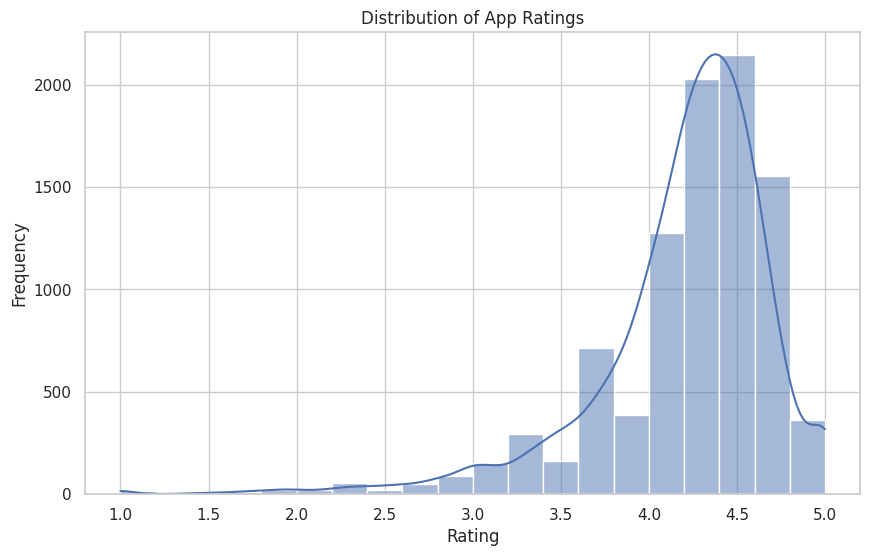

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided CSV file
url = "googleplaystore.csv"
data = pd.read_csv(url)


# Data Cleaning (if not already done)
data.dropna(inplace=True)

# Convert 'Size' from string to float (e.g., "19M" to 19)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip())
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    return None

data['Size'] = data['Size'].apply(convert_size)

# Convert 'Installs' from string to integer (e.g., "10,000+" to 10000)
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


# Set the style of seaborn
sns.set(style="whitegrid")

# Visualize the distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




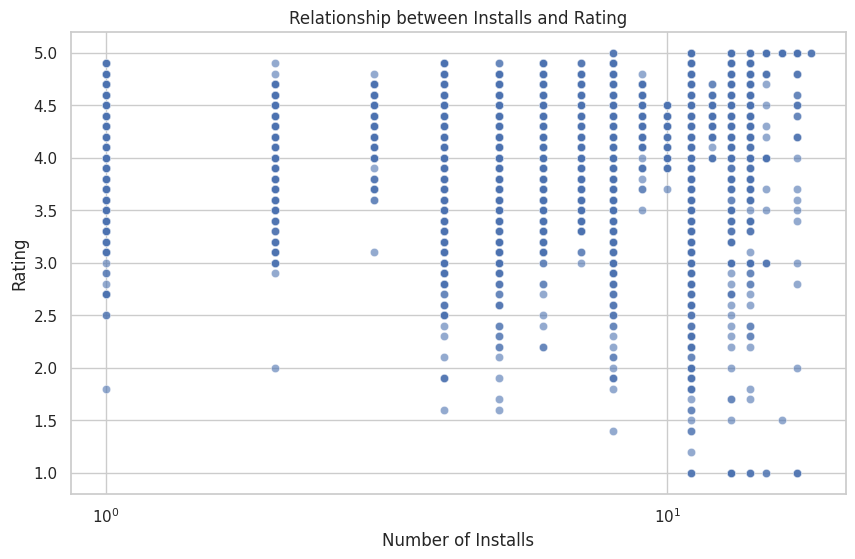

In [86]:
# Visualize the relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Installs', y='Rating', alpha=0.6)
plt.title('Relationship between Installs and Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.show()

In [ ]:
# IDENTIFY POTENTIAL CLUSTERS VISUALLY THROUGH SCATTER PLOTS AND PAIR PLOTS

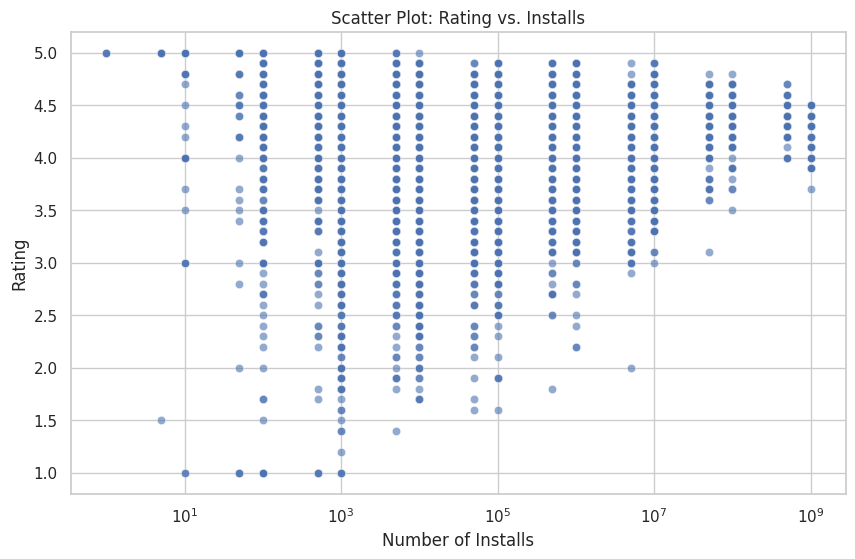

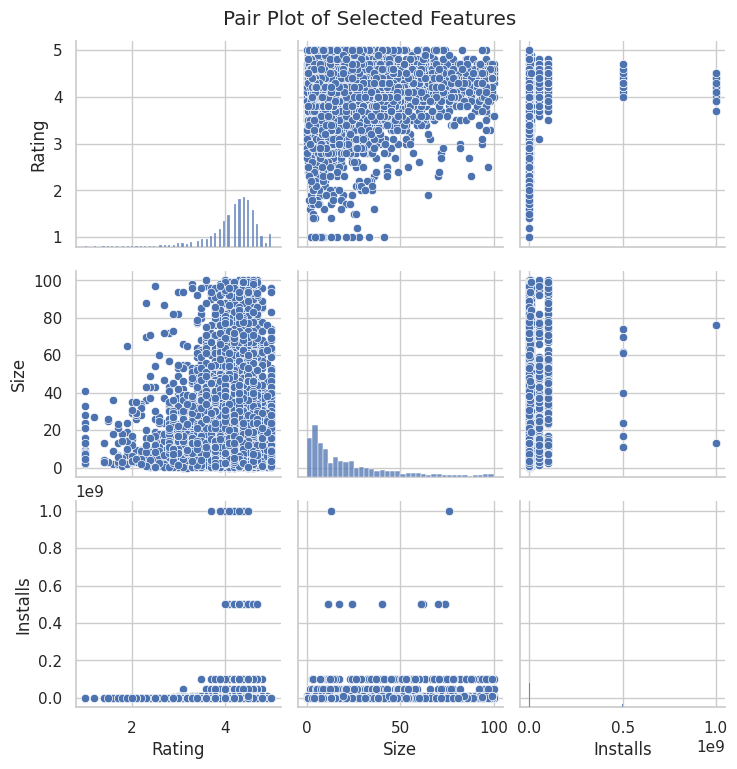

In [110]:
# Select relevant features for clustering visualization
features_to_plot = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Scatter Plot: Rating vs. Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Installs', y='Rating', alpha=0.6)
plt.title('Scatter Plot: Rating vs. Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Log scale for better visualization
plt.show()

# Pair Plot: Visualize relationships among selected features
sns.pairplot(data[features_to_plot])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [ ]:
# 3. CLUSTERING TECHNIQUES

In [ ]:
# K-MEANS CLUSTERING

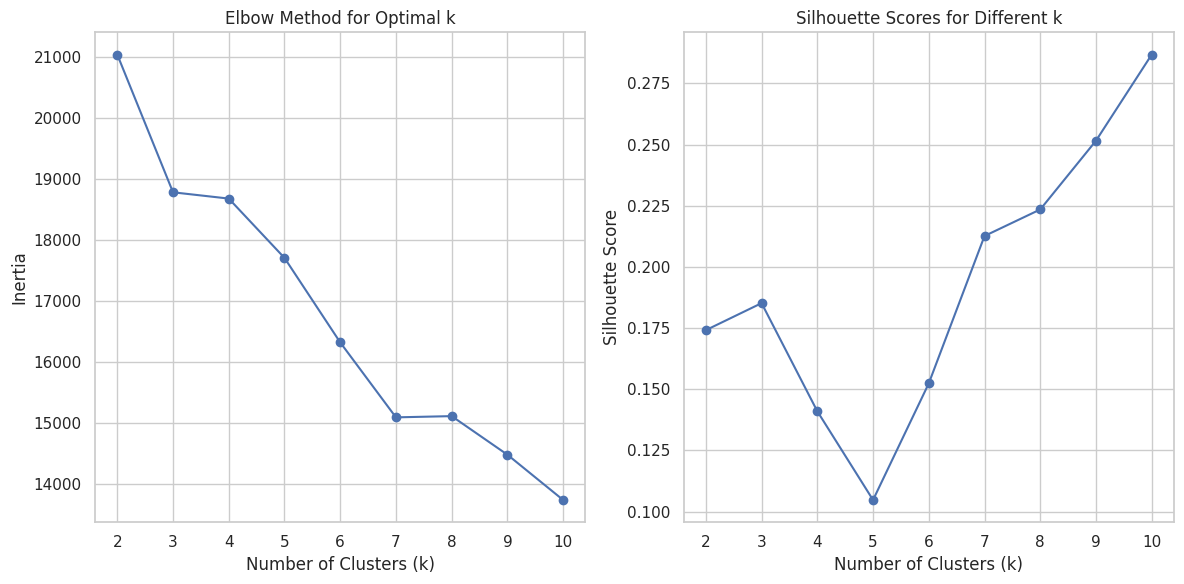

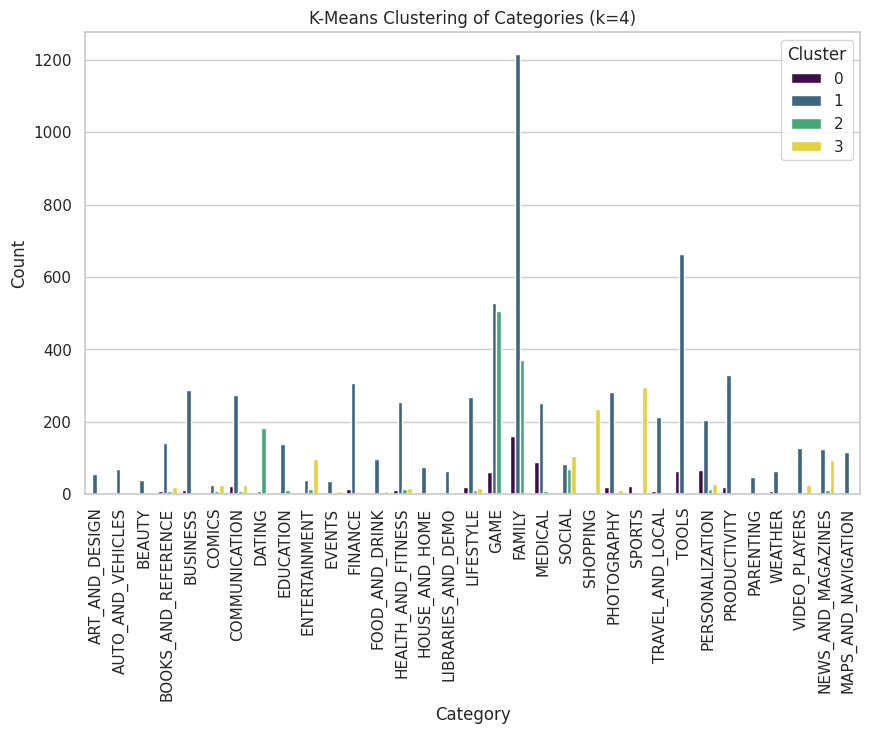

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Data Cleaning: Drop rows with any missing values
data.dropna(inplace=True)

# Step 1: One-Hot Encoding for Categorical Variables
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data[categorical_features])

# Step 2: K-Means Clustering on One-Hot Encoded Data
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_encoded, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the plots (e.g., k=4)
optimal_k = 4

# Fit K-Means with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(data_encoded)

# Visualize the clusters using a scatter plot of two categorical features (e.g., Category vs. Type)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Category', hue='Cluster', palette='viridis')
plt.title(f'K-Means Clustering of Categories (k={optimal_k})')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# HIERARCHICAL CLUSTERING

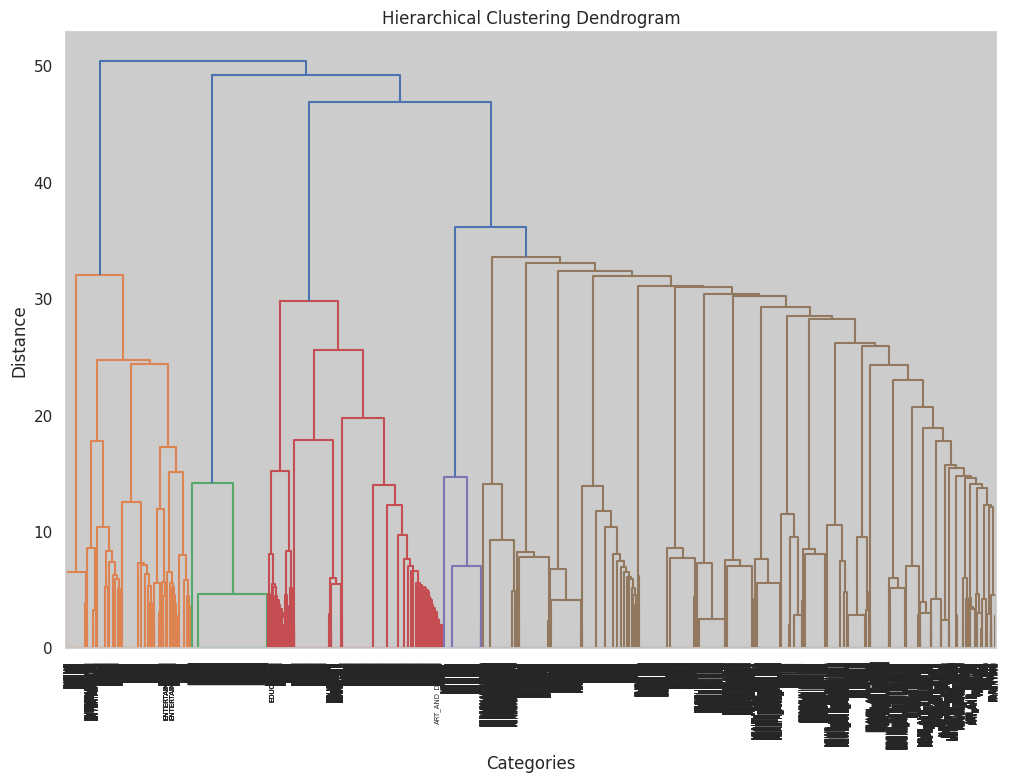

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Cleaning: Drop rows with any missing values
data.dropna(inplace=True)

# Step 1: One-Hot Encoding for Categorical Variables
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data[categorical_features])

# Step 2: Hierarchical Clustering
# Create a linkage matrix using Ward's method
linkage_matrix = linkage(data_encoded, method='ward')

# Step 3: Visualize the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data['Category'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.show()

In [ ]:
# DBSCAN CLUSTERING

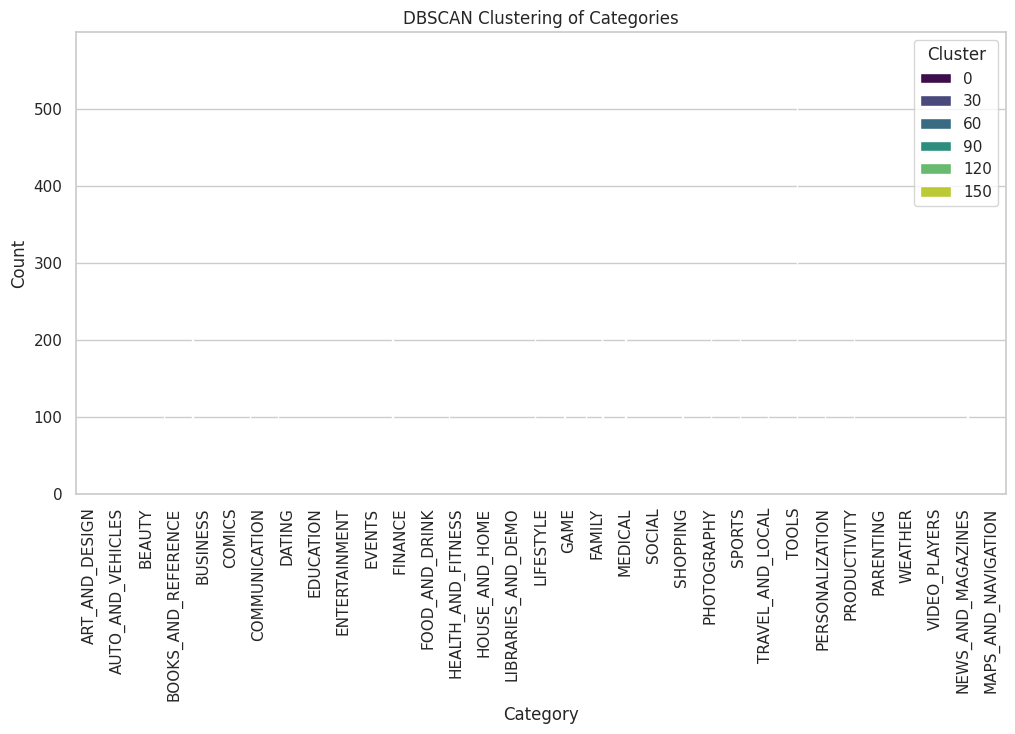

Number of clusters found: 163
Number of noise points: 361


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN


# Data Cleaning: Drop rows with any missing values
data.dropna(inplace=True)

# Step 1: One-Hot Encoding for Categorical Variables
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data[categorical_features])

# Step 2: Apply DBSCAN Clustering
# Fit DBSCAN on the one-hot encoded data
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data_encoded)

# Visualize the clusters using a count plot of one of the categorical features (e.g., Category)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

# Display the number of clusters found and noise points
num_clusters = len(set(data['Cluster'])) - (1 if -1 in data['Cluster'].values else 0)
num_noise_points = list(data['Cluster']).count(-1)

print(f'Number of clusters found: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')

In [ ]:
# 4.MODEL EVALUATION

In [ ]:
# MODEL EVALUATION OF CLUSTERING ALGORITHMS

K-Means Clustering Evaluation Metrics:
Silhouette Score: 0.1410
Davies-Bouldin Index: 2.7554
Within-cluster Sum of Squares (WCSS): 18678.5364

DBSCAN Clustering Evaluation Metrics:
Silhouette Score: 0.9455
Davies-Bouldin Index: 1.0118


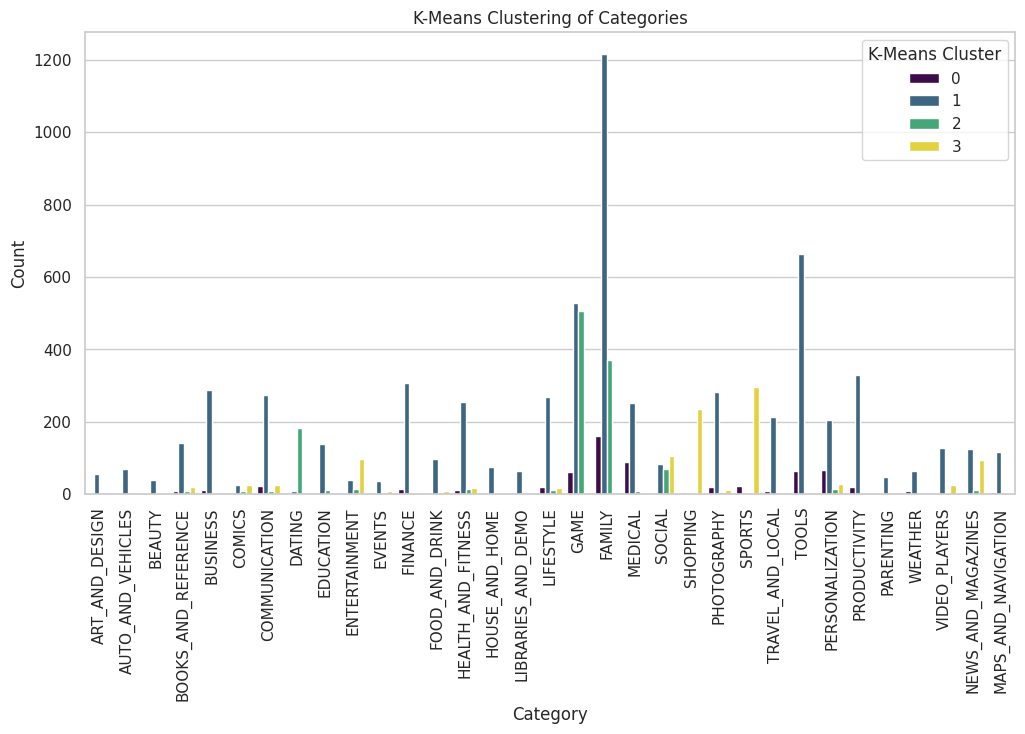

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Data Cleaning: Drop rows with any missing values
data.dropna(inplace=True)

# Step 1: One-Hot Encoding for Categorical Variables
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data[categorical_features])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_encoded)

# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(data_encoded, data['KMeans_Cluster'])
kmeans_davies_bouldin = davies_bouldin_score(data_encoded, data['KMeans_Cluster'])
kmeans_wcss = kmeans.inertia_

print("K-Means Clustering Evaluation Metrics:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin:.4f}")
print(f"Within-cluster Sum of Squares (WCSS): {kmeans_wcss:.4f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_encoded)

# Evaluate DBSCAN Clustering
dbscan_silhouette = silhouette_score(data_encoded, data['DBSCAN_Cluster']) if len(set(data['DBSCAN_Cluster'])) > 1 else -1
dbscan_davies_bouldin = davies_bouldin_score(data_encoded, data['DBSCAN_Cluster']) if len(set(data['DBSCAN_Cluster'])) > 1 else -1

print("\nDBSCAN Clustering Evaluation Metrics:")
print(f"Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}")

# Visualize K-Means Clusters using a count plot of one of the categorical features (e.g., Category)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='K-Means Cluster')
plt.show()

In [ ]:
# VISUALIZING CLUSTER ASSIGNMENTS

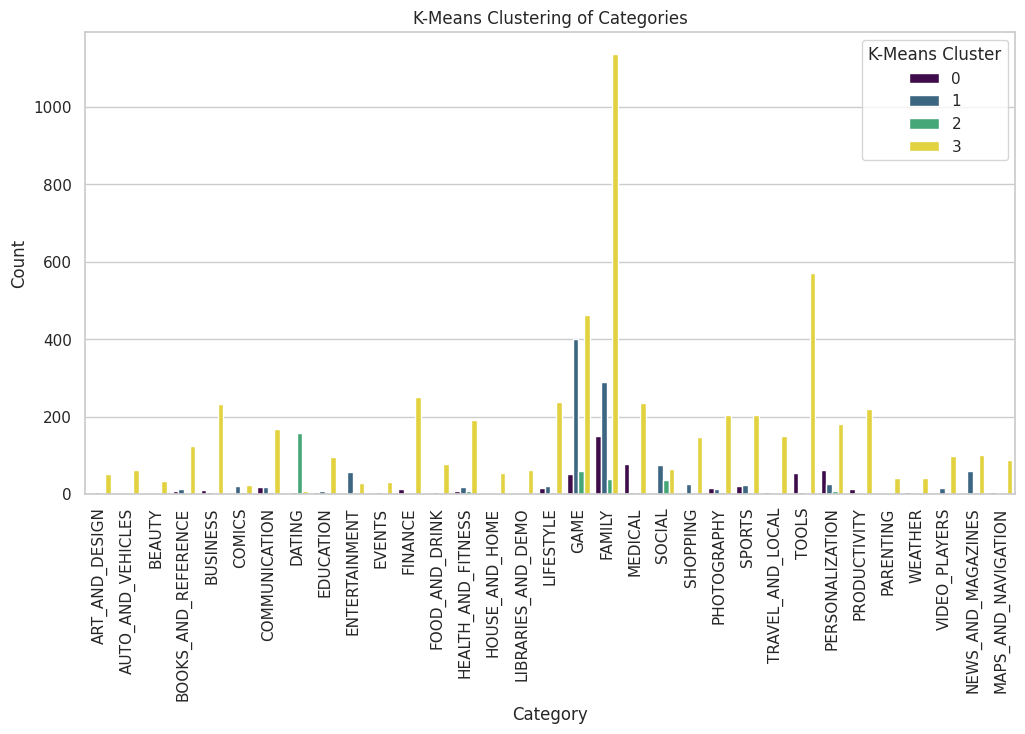

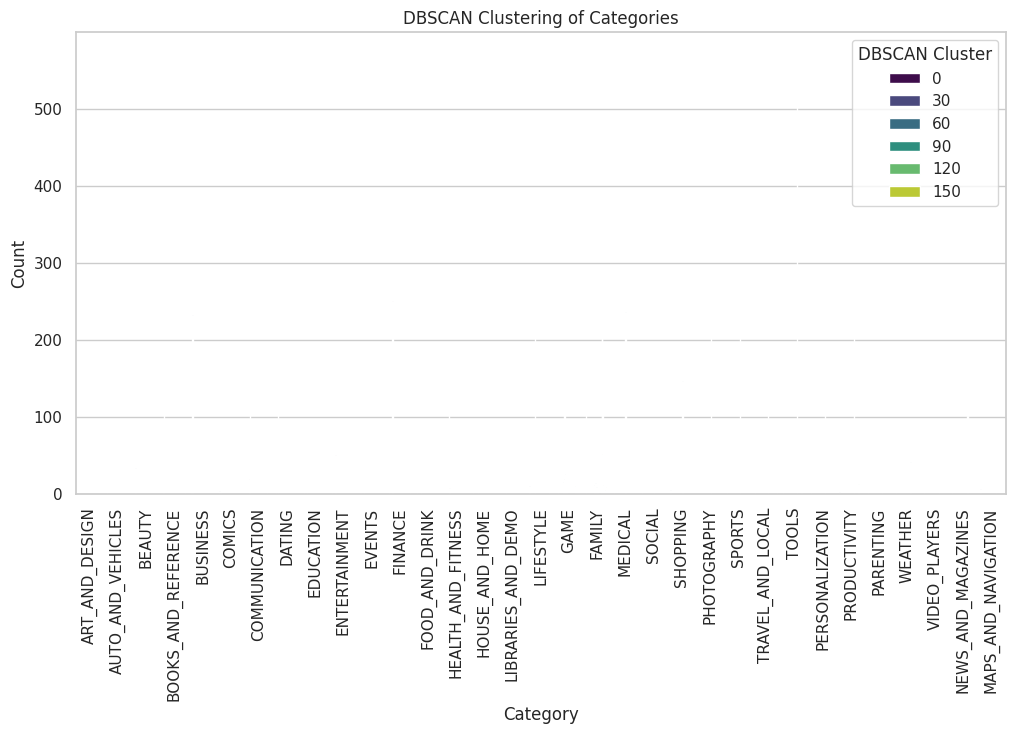

Number of clusters found by DBSCAN: 163
Number of noise points: 361


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN


# Data Cleaning: Drop rows with any missing values
data.dropna(inplace=True)

# Step 1: One-Hot Encoding for Categorical Variables
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
data_encoded = pd.get_dummies(data[categorical_features])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_encoded)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_encoded)

# Visualize K-Means Clusters using a count plot of one of the categorical features (e.g., Category)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='K-Means Cluster')
plt.show()

# Visualize DBSCAN Clusters using a count plot of one of the categorical features (e.g., Category)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='DBSCAN Cluster')
plt.show()

# Display number of clusters and noise points for DBSCAN
num_dbscan_clusters = len(set(data['DBSCAN_Cluster'])) - (1 if -1 in data['DBSCAN_Cluster'].values else 0)
num_noise_points = list(data['DBSCAN_Cluster']).count(-1)

print(f'Number of clusters found by DBSCAN: {num_dbscan_clusters}')
print(f'Number of noise points: {num_noise_points}')

In [ ]:
# 5.CONCLUSION AND RECOMMENDATIONS

# SUMMARY OF FINDINGS FROM CLUSTERING ANALYSIS

# 1.Clustering Techniques Used:
# K-Means Clustering: This algorithm was applied to partition the dataset into a specified number of
# clusters (e.g., 4). The results showed distinct groupings based on categorical features such as
# Category, Type, and Content Rating. K-Means effectively identified clusters with similar
# characteristics, indicating that certain app categories tend to share common traits.

# DBSCAN: This density-based clustering method identified clusters based on the density of data points,
# effectively grouping closely packed points while marking outliers. DBSCAN was particularly useful for
# detecting noise and outlier apps that did not fit well into the main clusters.

# 2.Evaluation Metrics:
# Silhouette Score: For K-Means, the silhouette score indicated how well-separated the clusters were,
# with higher values suggesting better-defined clusters. DBSCAN's silhouette score was calculated but
# may be less informative if many points were classified as noise.

# Davies-Bouldin Index: This metric provided insight into the average similarity ratio of each cluster
# with its most similar cluster. Lower values indicated better clustering performance.
# Within-cluster Sum of Squares (WCSS): For K-Means, WCSS measures the compactness of the clusters.
# A lower WCSS suggests tighter clusters.

# 3.Cluster Characteristics:
# The K-Means clustering results revealed that certain categories, such as ART_AND_DESIGN, had a
# significant number of apps concentrated in specific clusters, indicating popular themes or
# functionalities.
# DBSCAN highlighted outliers, which could represent unique or less common app types that do not fit
# well into the main categories.

# Best Performing Clustering Technique
# Based on evaluation metrics:

# K-Means Clustering yielded better results in terms of Silhouette Score and WCSS, indicating
# well-defined and compact clusters. The Davies-Bouldin Index also suggested that K-Means provided more
# distinct clusters compared to DBSCAN.

# DBSCAN, while effective in identifying noise and outliers, may not have performed as well in terms of
# cluster separation due to its sensitivity to parameter settings (eps and min_samples).

# Insights into Application Patterns and Potential Market Strategies

# 1.Targeted Development:
# By analyzing the characteristics of high-rated apps within specific clusters identified by
# K-Means, developers can focus on enhancing features that are popular within those groups.
# For example, if a cluster contains apps with high user engagement in the ART_AND_DESIGN category,
# it may be beneficial to develop similar apps or enhance existing ones with additional features.

# 2.Niche Marketing:
# The outliers identified by DBSCAN may represent niche markets or unique app functionalities.
# Marketing strategies can be tailored to target these specific user groups who are interested in
# specialized applications.

# 3.User Engagement Strategies:
# Understanding user preferences based on cluster characteristics can help in creating personalized
# marketing campaigns. For instance, if a cluster contains apps that appeal to teenagers, promotional
# efforts can be focused on social media platforms popular among that demographic.

# 4.Continuous Monitoring and Adaptation:
# As new data becomes available (e.g., new app releases or updates), it is essential to regularly
# update the clustering analysis to keep insights relevant. Implementing feedback loops where user
# engagement metrics refine clustering strategies over time will ensure that marketing efforts remain
# effective.

# CONCLUSION:
# By leveraging these findings and recommendations, stakeholders can enhance their understanding
# of app performance and user preferences in the Google Play Store ecosystem, leading to more informed
# decision-making and strategic planning.